In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split

### Selecting Data

In [2]:
idata=pd.read_csv('dataset.csv')

In [3]:
idata.isnull().sum()

app_id               0
app_name        183234
review_text       7305
review_score         0
review_votes         0
dtype: int64

In [4]:
idata=idata.dropna()

In [5]:
idata.shape

(6226728, 5)

In [6]:
idata.duplicated().sum()

1742878

In [7]:
idata = idata.drop_duplicates()

In [8]:
idata.shape

(4483850, 5)

<Axes: xlabel='review_score', ylabel='count'>

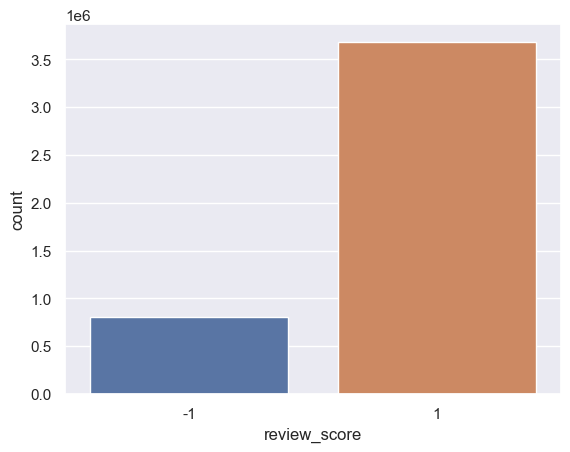

In [9]:
sns.countplot(x='review_score',data=idata)

In [10]:
data=pd.concat([idata.drop(idata[idata['review_score']!=1].index,inplace = False).head(60000),
                 idata.drop(idata[idata['review_score']!=-1].index,inplace = False).head(60000)])

In [11]:
data.head()

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1


<Axes: xlabel='review_score', ylabel='count'>

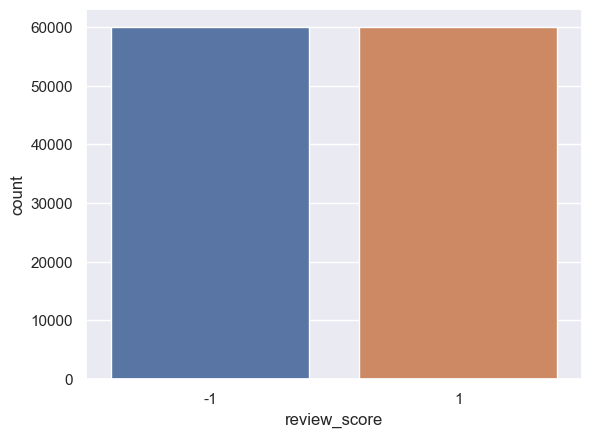

In [12]:
sns.countplot(x='review_score',data=data)

In [13]:
data=data.sample(frac=1,random_state=24).reset_index()

In [14]:
data=data.drop('index',axis=1)
data.head()

,app_id,app_name,review_text,review_score,review_votes
0,104900,ORION: Prelude,THIS GAME ISNT WORTH THE SECONDS OF YOUR LIFE ...,-1,0
1,113420,Fallen Earth,the ground didnot spawn in,-1,0
2,104900,ORION: Prelude,Lmao Ill tell you right now the games not even...,-1,0
3,10090,Call of Duty: World at War,Got to say this is by far the best call of dut...,1,0
4,12330,DarkStar One,"Freelancer's better. Having said that, this ba...",-1,1


In [15]:
data.isnull().sum()

app_id          0
app_name        0
review_text     0
review_score    0
review_votes    0
dtype: int64

In [16]:
data.duplicated().sum()

0

In [17]:
data.rename(columns = {'review_score':'Score'}, inplace = True)
data.rename(columns = {'review_text':'Review'}, inplace = True)

In [18]:
data['Score']=data['Score'].map({-1:0,1:1})

In [19]:
data.head()

,app_id,app_name,Review,Score,review_votes
0,104900,ORION: Prelude,THIS GAME ISNT WORTH THE SECONDS OF YOUR LIFE ...,0,0
1,113420,Fallen Earth,the ground didnot spawn in,0,0
2,104900,ORION: Prelude,Lmao Ill tell you right now the games not even...,0,0
3,10090,Call of Duty: World at War,Got to say this is by far the best call of dut...,1,0
4,12330,DarkStar One,"Freelancer's better. Having said that, this ba...",0,1


In [20]:
data['Review'][0]

'THIS GAME ISNT WORTH THE SECONDS OF YOUR LIFE TO DOWNLOAD IT.'

### Preprocessing

In [21]:
import re
from nltk.corpus import stopwords

estopwords=stopwords.words('english')
estopwords.remove('not')

In [22]:
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)

In [23]:
def preprocess_text(sen,stopwords=['^'],singleremover=True):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove html tags
    sentence = remove_tags(sentence)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    if singleremover:
        sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
        # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

In [24]:
x=[]
for i in data['Review']:
    x.append(preprocess_text(i,estopwords))

In [25]:
x[1]

'ground didnot spawn '

In [26]:
inputs=np.array(x)
targets=np.array(data['Score'])

In [27]:
inputs

array(['game isnt worth seconds life download ', 'ground didnot spawn ',
       'lmao ill tell right games not even worth given game friend ago first came first like mins uninstalled garbage came back little ago seen changed since not still garbage almost bought friends however didnt feel like would played much would waste could go get soda something better game looks amazing looks like would lot fun maybe not stand graphics animations gameplay ',
       ...,
       'honestly get felt bit rails screenshots expected something like gta focusing detectives controls also felt right ',
       'played game school teacher game ',
       'pay win game ever fun made addictave spend money play got money'],
      dtype='<U7982')

### Embedding

In [28]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.20, random_state=42)

In [29]:
x_train[11]

'pretty great blast past remember playing game even better started nazi zombies honestly last good game cod series '

In [30]:
y_train[11]

1

In [31]:
x_test[11]

'good fun game '

In [32]:
y_test[11]

1

In [33]:
from tensorflow import keras

In [34]:
tokenizer= keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(x_train)

In [ ]:
import pickle
file = open("tokenizer.pkl",'wb')
pickle.dump(tokenizer,file)
file.close()

In [35]:
x_train=tokenizer.texts_to_sequences(x_train)
x_test=tokenizer.texts_to_sequences(x_test)

In [36]:
vocab_length = len(tokenizer.word_index) + 1

In [37]:
x_train[0]

[276, 516, 322, 317, 233, 245]

In [38]:
maxlen = 50

x_train = keras.preprocessing.sequence.pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, padding='post', maxlen=maxlen)

### Model Building

In [39]:
model = keras.Sequential()

In [40]:
model.add(keras.layers.Embedding(vocab_length,output_dim=10,input_length=maxlen))
model.add(keras.layers.LSTM(128,return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(128,return_sequences=False))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 10)            643140    
                                                                 
 lstm (LSTM)                 (None, 50, 128)           71168     
                                                                 
 dropout (Dropout)           (None, 50, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 846021 (3.23 MB)
Trainable params: 846021 (3.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
history=model.fit(x_train,y_train,batch_size=128, epochs=126, verbose=1, validation_split=0.2)

Epoch 1/126
600/600 [==============================] - 82s 131ms/step - loss: 0.3838 - accuracy: 0.8208 - val_loss: 0.3313 - val_accuracy: 0.8520
Epoch 2/126
600/600 [==============================] - 81s 135ms/step - loss: 0.2715 - accuracy: 0.8896 - val_loss: 0.3245 - val_accuracy: 0.8600
Epoch 3/126
600/600 [==============================] - 81s 135ms/step - loss: 0.2357 - accuracy: 0.9054 - val_loss: 0.3765 - val_accuracy: 0.8576
Epoch 4/126
600/600 [==============================] - 80s 133ms/step - loss: 0.2138 - accuracy: 0.9144 - val_loss: 0.4039 - val_accuracy: 0.8458
Epoch 5/126
600/600 [==============================] - 80s 133ms/step - loss: 0.1950 - accuracy: 0.9225 - val_loss: 0.3540 - val_accuracy: 0.8522
Epoch 6/126
600/600 [==============================] - 82s 136ms/step - loss: 0.1818 - accuracy: 0.9282 - val_loss: 0.3780 - val_accuracy: 0.8501
Epoch 7/126
600/600 [==============================] - 80s 134ms/step - loss: 0.1696 - accuracy: 0.9318 - val_loss: 0.4190 -

### Model Testing

In [44]:
score = model.evaluate(x_test, y_test, verbose=1)

750/750 [==============================] - 12s 15ms/step - loss: 1.3646 - accuracy: 0.8273


In [45]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 1.3645949363708496
Test Accuracy: 0.8273333311080933


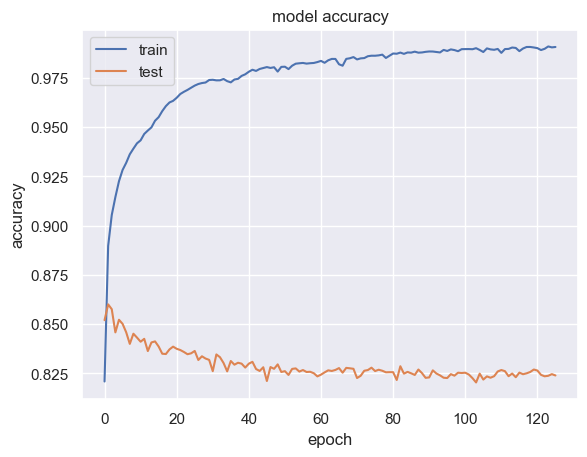

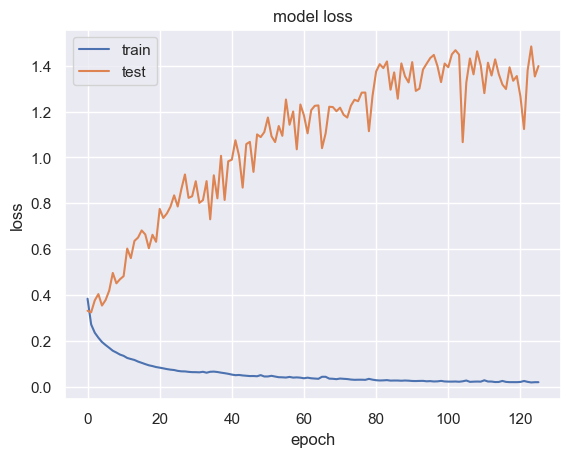

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Testing on unseen data

In [47]:
unseen=pd.concat([idata.drop(idata[idata['review_score']!=1].index,inplace = False).tail(2),
                 idata.drop(idata[idata['review_score']!=-1].index,inplace = False).tail(3)])

In [48]:
unseen

,app_id,app_name,review_text,review_score,review_votes
6416972,99910,Puzzle Pirates,I have been playing this game for over 3 yrs n...,1,0
6416973,99910,Puzzle Pirates,"Have so many good memories with this game, it'...",1,0
6417103,99910,Puzzle Pirates,"This game was aright, though a bit annoying. W...",-1,0
6417104,99910,Puzzle Pirates,"I had a nice review to recommend this game, bu...",-1,0
6417105,99910,Puzzle Pirates,"The puzzles in this game are fun, but you have...",-1,0


In [49]:
unseen_reviews = unseen['review_text']

unseen_processed = []
for review in unseen_reviews:
  unseen_processed.append(preprocess_text(review))
# Tokenising instance with earlier trained tokeniser
unseen_tokenized = tokenizer.texts_to_sequences(unseen_processed)

# Pooling instance to have maxlength of 100 tokens
unseen_padded = keras.preprocessing.sequence.pad_sequences(unseen_tokenized, padding='post', maxlen=maxlen)
unseen_sentiments = model.predict(unseen_padded)

1/1 [==============================] - 1s 629ms/step


In [50]:
unseen_sentiments

array([[9.9999577e-01],
       [9.9998254e-01],
       [1.9993686e-05],
       [6.1963988e-06],
       [3.5280427e-06]], dtype=float32)

In [51]:
unseen['Predicted Sentiments'] = np.round(unseen_sentiments*10,2)/10
unseen.head()

,app_id,app_name,review_text,review_score,review_votes,Predicted Sentiments
6416972,99910,Puzzle Pirates,I have been playing this game for over 3 yrs n...,1,0,1.0
6416973,99910,Puzzle Pirates,"Have so many good memories with this game, it'...",1,0,1.0
6417103,99910,Puzzle Pirates,"This game was aright, though a bit annoying. W...",-1,0,0.0
6417104,99910,Puzzle Pirates,"I had a nice review to recommend this game, bu...",-1,0,0.0
6417105,99910,Puzzle Pirates,"The puzzles in this game are fun, but you have...",-1,0,0.0


In [52]:
unseen = unseen.reset_index()
unseen = unseen.drop(['app_id','review_votes','index'],axis=1)
unseen['review_score'] = unseen['review_score'].map({-1:0,1:1})
unseen

,app_name,review_text,review_score,Predicted Sentiments
0,Puzzle Pirates,I have been playing this game for over 3 yrs n...,1,1.0
1,Puzzle Pirates,"Have so many good memories with this game, it'...",1,1.0
2,Puzzle Pirates,"This game was aright, though a bit annoying. W...",0,0.0
3,Puzzle Pirates,"I had a nice review to recommend this game, bu...",0,0.0
4,Puzzle Pirates,"The puzzles in this game are fun, but you have...",0,0.0


In [56]:
model.save(f"Models/c1_lstm_model_acc_highaccr{round(score[1], 3)}.keras", save_format='keras')